# Heart Disease Analysis - Complete Code

## 1. Library Imports and Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2, RFE, SelectFromModel
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                           confusion_matrix, classification_report, roc_curve, auc, roc_auc_score)
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set style and colors
plt.style.use('seaborn-v0_8')
PRIMARY_COLOR = '#2E86AB'
SECONDARY_COLOR = '#A23B72'
ACCENT_COLOR = '#F18F01'
SUCCESS_COLOR = '#C73E1D'

## 2. Data Loading and Preprocessing

In [3]:
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg','thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

In [4]:
# Load the dataset
df = pd.read_csv('heart_disease.csv', names=column_names)
df = df.replace('?', np.nan)

In [5]:
print(f"Dataset Shape: {df.shape}")

Dataset Shape: (303, 14)


In [6]:
df['ca'] = df['ca'].astype(float)
df['thal'] = df['thal'].astype(float)

In [7]:
df['ca'].fillna(df['ca'].mode()[0], inplace=True)
df['thal'].fillna(df['thal'].mode()[0], inplace=True)

## 3. Data Exploration and Information

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [11]:
missing_values = df.isnull().sum()
missing_values

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
# Create binary target variable for classification
df['heart_disease'] = (df['target'] > 0).astype(int)

## 4. Data Visualization - Age Distribution

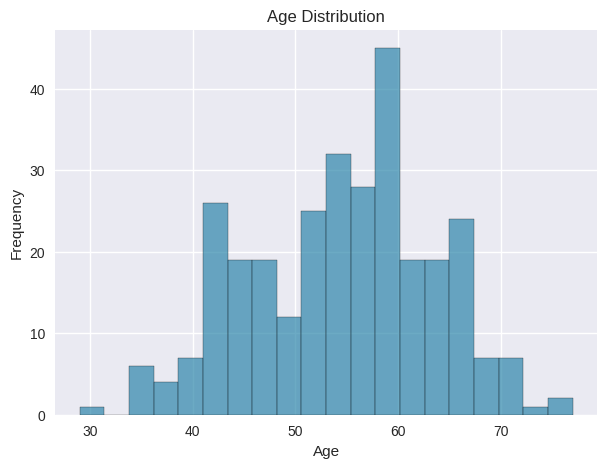

In [14]:
plt.figure(figsize=(7, 5))
plt.hist(df['age'], bins=20, color=PRIMARY_COLOR, alpha=0.7, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## 5. Data Visualization - Heart Disease Distribution

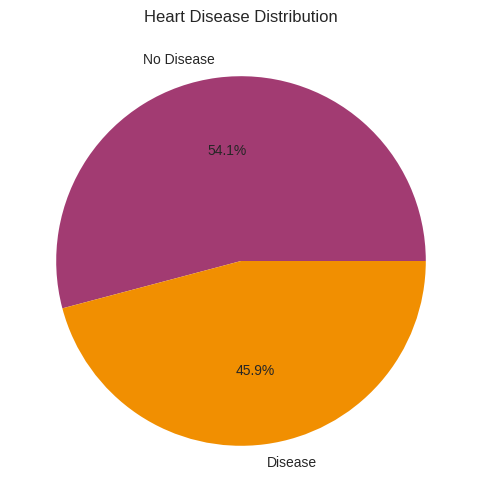

In [15]:
target_counts = df['heart_disease'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(target_counts.values, labels=['No Disease', 'Disease'], colors=[SECONDARY_COLOR, ACCENT_COLOR], autopct='%1.1f%%')
plt.title('Heart Disease Distribution')
plt.show()

## 6. Data Visualization - Gender vs Heart Disease

<Figure size 700x500 with 0 Axes>

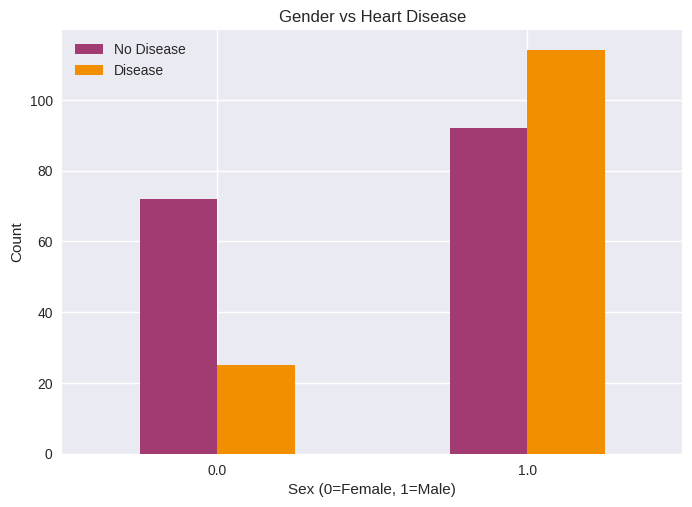

In [16]:
plt.figure(figsize=(7, 5))
pd.crosstab(df['sex'], df['heart_disease']).plot(kind='bar', color=[SECONDARY_COLOR, ACCENT_COLOR])
plt.title('Gender vs Heart Disease')
plt.xlabel('Sex (0=Female, 1=Male)')
plt.ylabel('Count')
plt.legend(['No Disease', 'Disease'])
plt.xticks(rotation=0)
plt.show()

## 7. Data Visualization - Chest Pain Type vs Heart Disease

<Figure size 700x500 with 0 Axes>

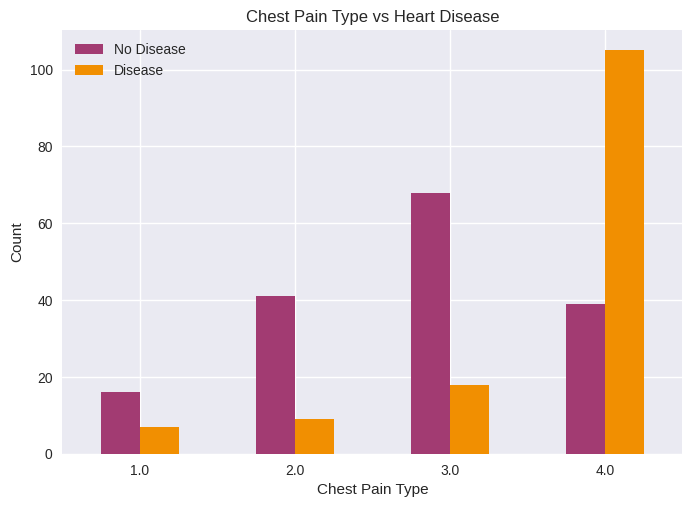

In [17]:
plt.figure(figsize=(7, 5))
pd.crosstab(df['cp'], df['heart_disease']).plot(kind='bar', color=[SECONDARY_COLOR, ACCENT_COLOR])
plt.title('Chest Pain Type vs Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(['No Disease', 'Disease'])
plt.xticks(rotation=0)
plt.show()

## 8. Correlation Analysis

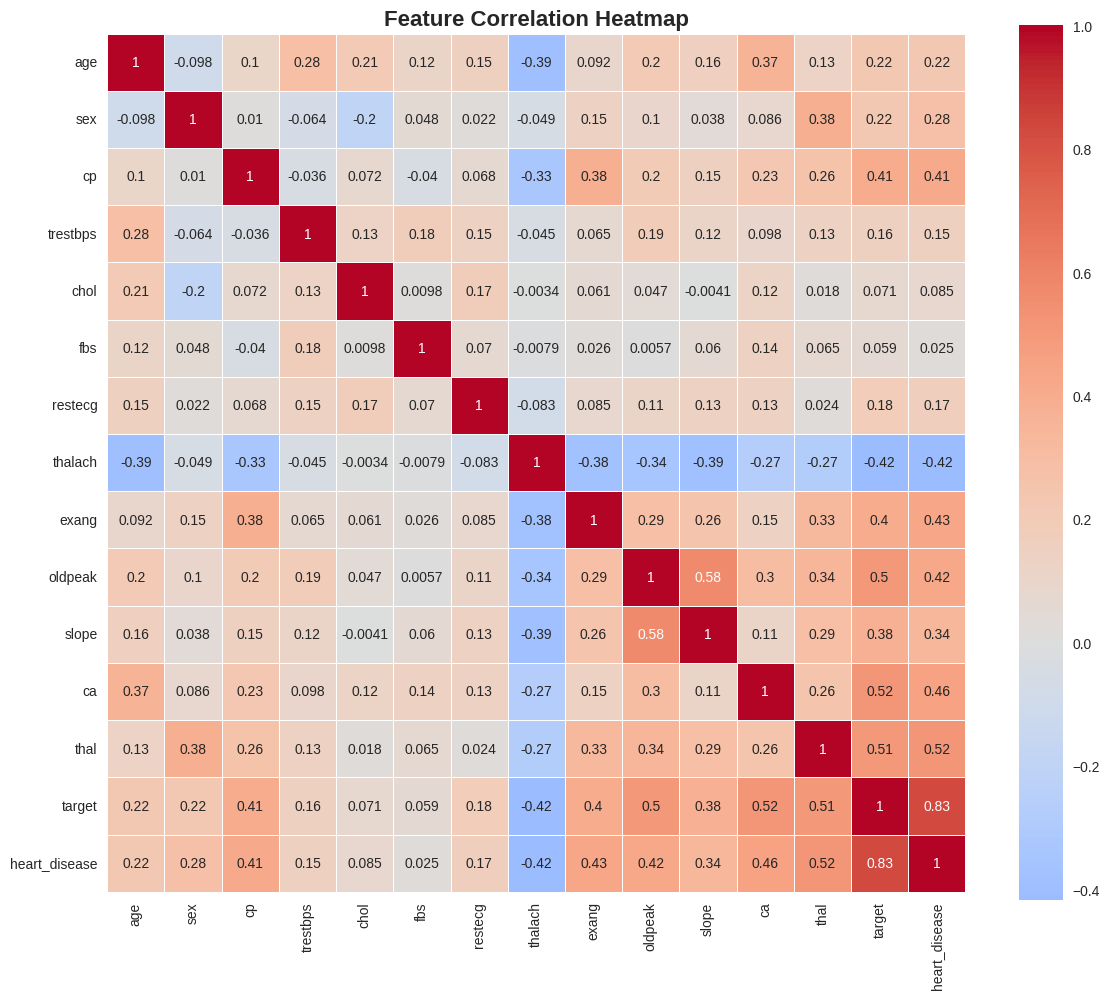

In [18]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True, linewidths=0.5)
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## 9. Feature Scaling and PCA

In [19]:
X = df.drop(['target', 'heart_disease'], axis=1)
y = df['heart_disease']

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [21]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [22]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components for 95% variance: {n_components_95}")

pca_final = PCA(n_components=n_components_95)
X_pca_final = pca_final.fit_transform(X_scaled)
print(f"PCA transformed shape: {X_pca_final.shape}")

Number of components for 95% variance: 12
PCA transformed shape: (303, 12)


## 10. Feature Selection - Random Forest Feature Importance


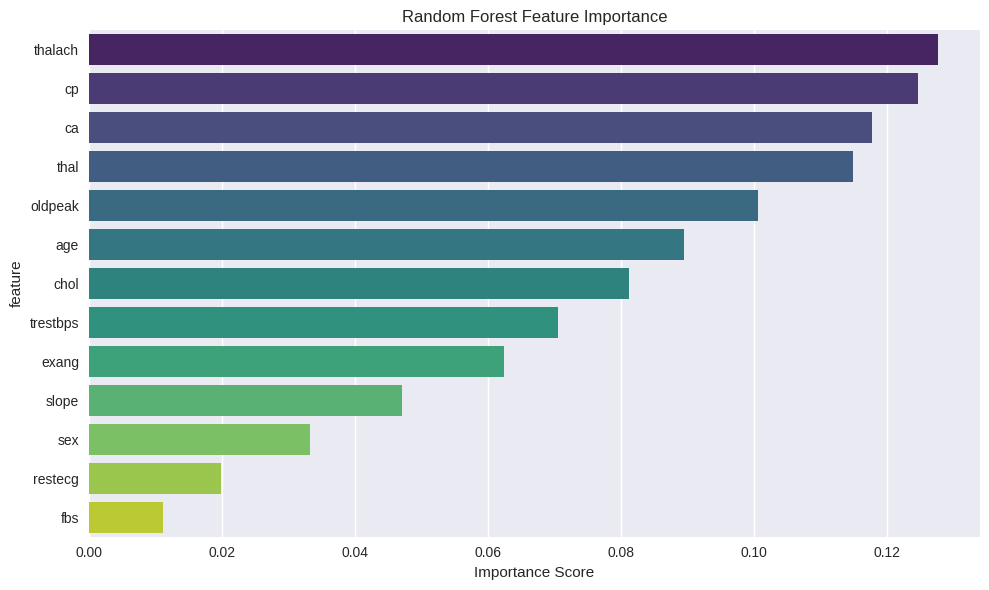

In [23]:
rf_selector = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selector.fit(X_scaled, y)

feature_importance = pd.DataFrame({'feature': X.columns,'importance': rf_selector.feature_importances_}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis')
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

## 11. Feature Selection - Recursive Feature Elimination (RFE)

In [24]:
rfe_selector = RFE(estimator=LogisticRegression(random_state=42), n_features_to_select=8)
X_rfe = rfe_selector.fit_transform(X_scaled, y)

rfe_features = X.columns[rfe_selector.support_]
print(f"Selected features by RFE: {list(rfe_features)}")

Selected features by RFE: ['sex', 'cp', 'trestbps', 'thalach', 'exang', 'oldpeak', 'ca', 'thal']


## 12. Feature Selection - Chi-Square Test

In [25]:
chi2_selector = SelectKBest(chi2, k=8)
X_chi2 = chi2_selector.fit_transform(X_scaled + abs(X_scaled.min()), y)

chi2_features = X.columns[chi2_selector.get_support()]
print(f"elected features by Chi2: {list(chi2_features)}")

selected_features = feature_importance.head(8)['feature'].values
X_selected = X_scaled[selected_features]
print(f"Using top {len(selected_features)} features for modeling:")
print(list(selected_features))

elected features by Chi2: ['sex', 'cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
Using top 8 features for modeling:
['thalach', 'cp', 'ca', 'thal', 'oldpeak', 'age', 'chol', 'trestbps']


## 13. Final Feature Selection

In [26]:
chi2_selector = SelectKBest(chi2, k=8)
X_chi2 = chi2_selector.fit_transform(X_scaled + abs(X_scaled.min()), y)
chi2_features = X.columns[chi2_selector.get_support()]
print(f"Selected features by Chi2: {list(chi2_features)}")

selected_features = feature_importance.head(8)['feature'].values
X_selected = X_scaled[selected_features]
print(f"Using top {len(selected_features)} features for modeling:")
print(list(selected_features))


Selected features by Chi2: ['sex', 'cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
Using top 8 features for modeling:
['thalach', 'cp', 'ca', 'thal', 'oldpeak', 'age', 'chol', 'trestbps']


## 14. Train-Test Split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2,random_state=42, stratify=y)

## 15. Model Training and Evaluation

In [28]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'SVM': SVC(random_state=42, probability=True)
}

In [29]:
results = {}
model_objects = {}

for name, model in models.items():
    print(f"Training {name}...")

    # Train model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None

    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }

    model_objects[name] = model

    print(f"   {name} Results:")
    print(f"   Accuracy: {accuracy:.4f}")
    print(f"   Precision: {precision:.4f}")
    print(f"   Recall: {recall:.4f}")
    print(f"   F1-Score: {f1:.4f}")
    if roc_auc:
        print(f"   ROC-AUC: {roc_auc:.4f}\n")

Training Logistic Regression...
   Logistic Regression Results:
   Accuracy: 0.8689
   Precision: 0.8125
   Recall: 0.9286
   F1-Score: 0.8667
   ROC-AUC: 0.9470

Training Decision Tree...
   Decision Tree Results:
   Accuracy: 0.7049
   Precision: 0.6471
   Recall: 0.7857
   F1-Score: 0.7097
   ROC-AUC: 0.7110

Training Random Forest...
   Random Forest Results:
   Accuracy: 0.8852
   Precision: 0.8621
   Recall: 0.8929
   F1-Score: 0.8772
   ROC-AUC: 0.9367

Training SVM...
   SVM Results:
   Accuracy: 0.8525
   Precision: 0.8065
   Recall: 0.8929
   F1-Score: 0.8475
   ROC-AUC: 0.9221



In [30]:
# Results comparison
results_df = pd.DataFrame(results).T
print(f"Model Comparison:")
print(results_df[['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']].round(4))


Model Comparison:
                     Accuracy Precision    Recall  F1-Score   ROC-AUC
Logistic Regression  0.868852    0.8125  0.928571  0.866667   0.94697
Decision Tree        0.704918  0.647059  0.785714  0.709677  0.711039
Random Forest        0.885246  0.862069  0.892857  0.877193  0.936688
SVM                  0.852459  0.806452  0.892857  0.847458  0.922078


## 16. Confusion Matrix

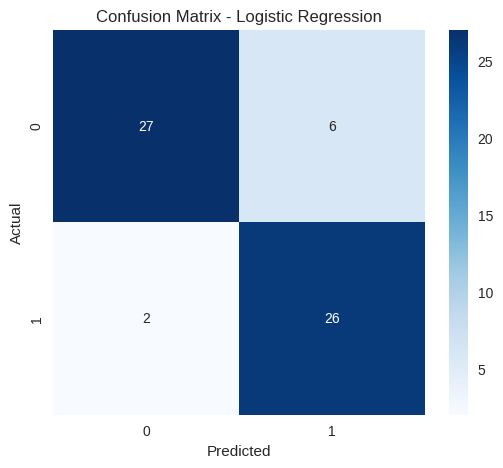

In [31]:
cm = confusion_matrix(y_test, results['Logistic Regression']['predictions'])
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

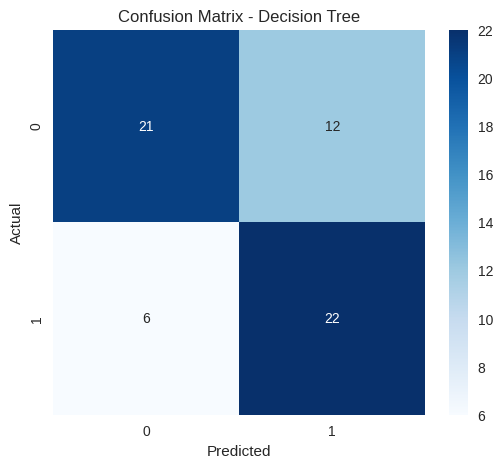

In [32]:
cm = confusion_matrix(y_test, results['Decision Tree']['predictions'])
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

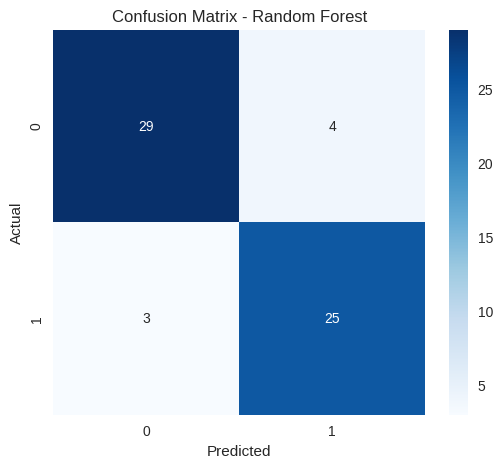

In [33]:
cm = confusion_matrix(y_test, results['Random Forest']['predictions'])
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


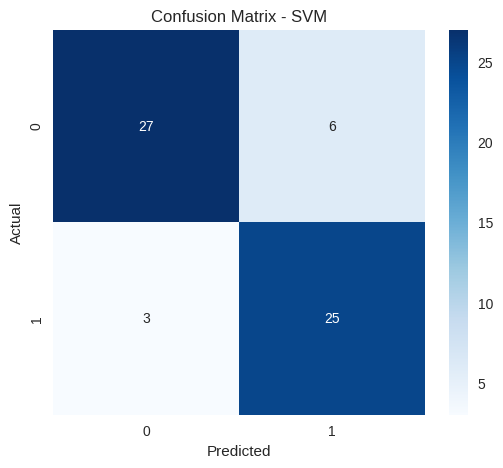

In [34]:
cm = confusion_matrix(y_test, results['SVM']['predictions'])
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 17. Comparison Visualization

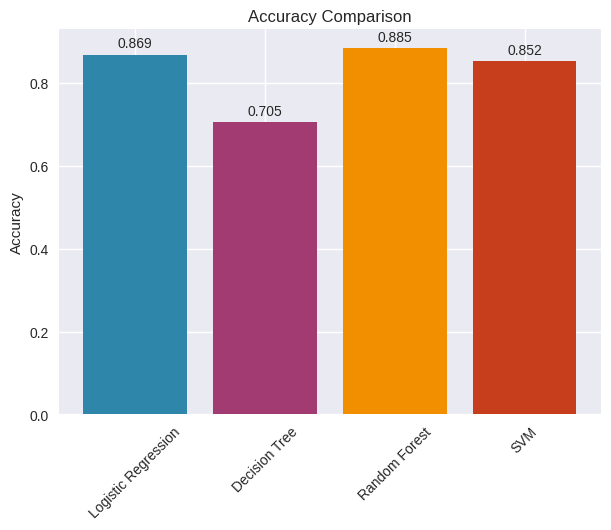

In [35]:
plt.figure(figsize=(7,5))
values = results_df['Accuracy'].values
model_names = results_df.index

bars = plt.bar(model_names, values, color=[PRIMARY_COLOR, SECONDARY_COLOR,
                                           ACCENT_COLOR, SUCCESS_COLOR])
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)

for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{value:.3f}', ha='center', va='bottom')

plt.show()


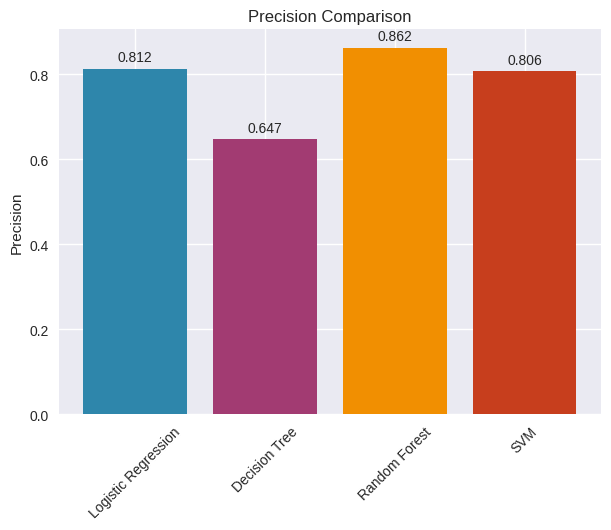

In [36]:
plt.figure(figsize=(7,5))
values = results_df['Precision'].values
model_names = results_df.index

bars = plt.bar(model_names, values, color=[PRIMARY_COLOR, SECONDARY_COLOR,
                                           ACCENT_COLOR, SUCCESS_COLOR])
plt.title('Precision Comparison')
plt.ylabel('Precision')
plt.xticks(rotation=45)

for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{value:.3f}', ha='center', va='bottom')

plt.show()


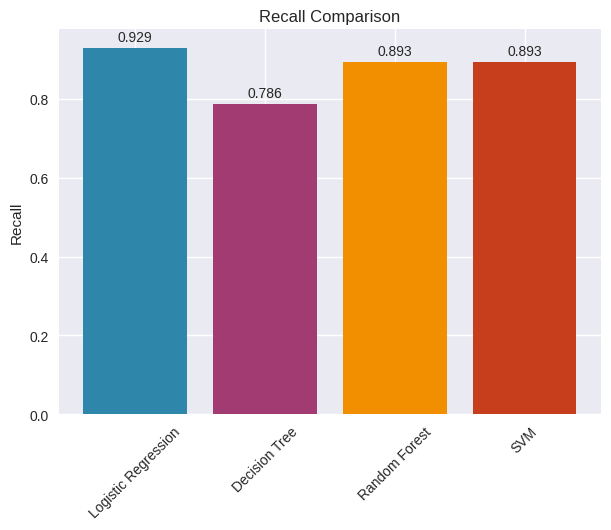

In [37]:
plt.figure(figsize=(7,5))
values = results_df['Recall'].values
model_names = results_df.index

bars = plt.bar(model_names, values, color=[PRIMARY_COLOR, SECONDARY_COLOR,
                                           ACCENT_COLOR, SUCCESS_COLOR])
plt.title('Recall Comparison')
plt.ylabel('Recall')
plt.xticks(rotation=45)

for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{value:.3f}', ha='center', va='bottom')

plt.show()


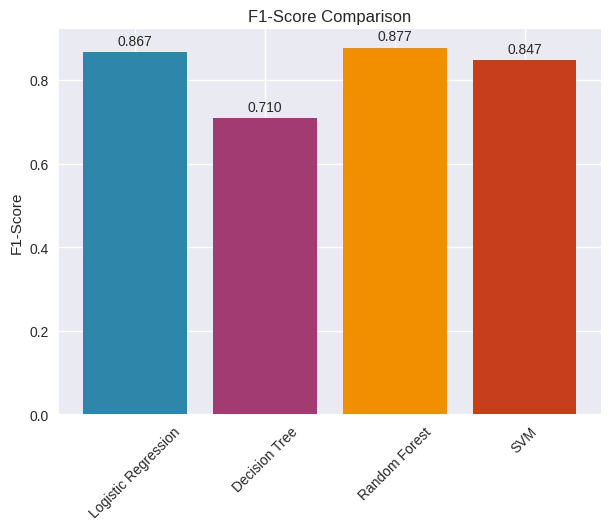

In [38]:
plt.figure(figsize=(7,5))
values = results_df['F1-Score'].values
model_names = results_df.index

bars = plt.bar(model_names, values, color=[PRIMARY_COLOR, SECONDARY_COLOR,
                                           ACCENT_COLOR, SUCCESS_COLOR])
plt.title('F1-Score Comparison')
plt.ylabel('F1-Score')
plt.xticks(rotation=45)

for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{value:.3f}', ha='center', va='bottom')

plt.show()


## 18. ROC Curves Comparison

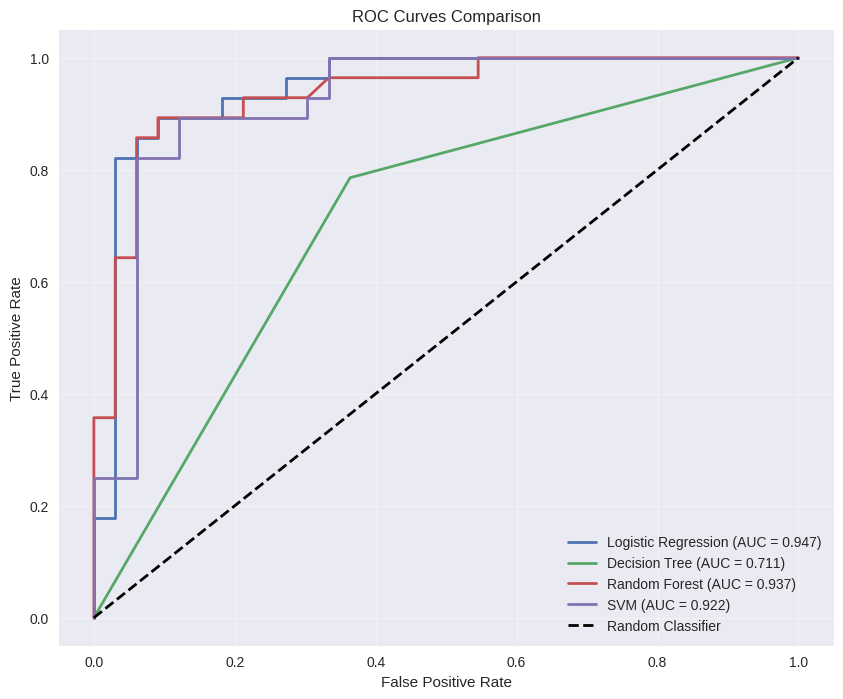

In [39]:
plt.figure(figsize=(10, 8))
for name in models.keys():
    if results[name]['probabilities'] is not None:
        fpr, tpr, _ = roc_curve(y_test, results[name]['probabilities'])
        roc_auc = results[name]['ROC-AUC']
        plt.plot(fpr, tpr, linewidth=2, label=f'{name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 19. Unsupervised Learning - K-Means Clustering

UNSUPERVISED LEARNING - CLUSTERING
K-Means Clustering


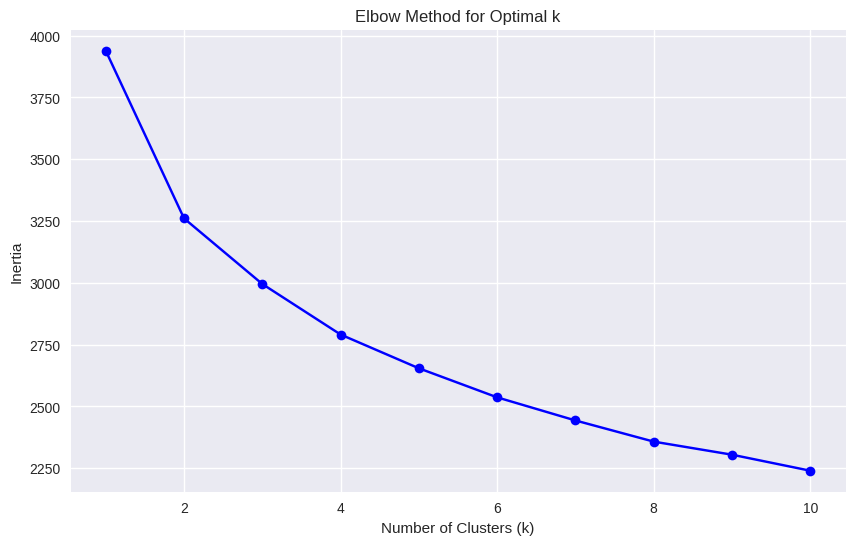

In [40]:
print("UNSUPERVISED LEARNING - CLUSTERING")
print("K-Means Clustering")

inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [41]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

## 20. K-Means Clustering Visualization


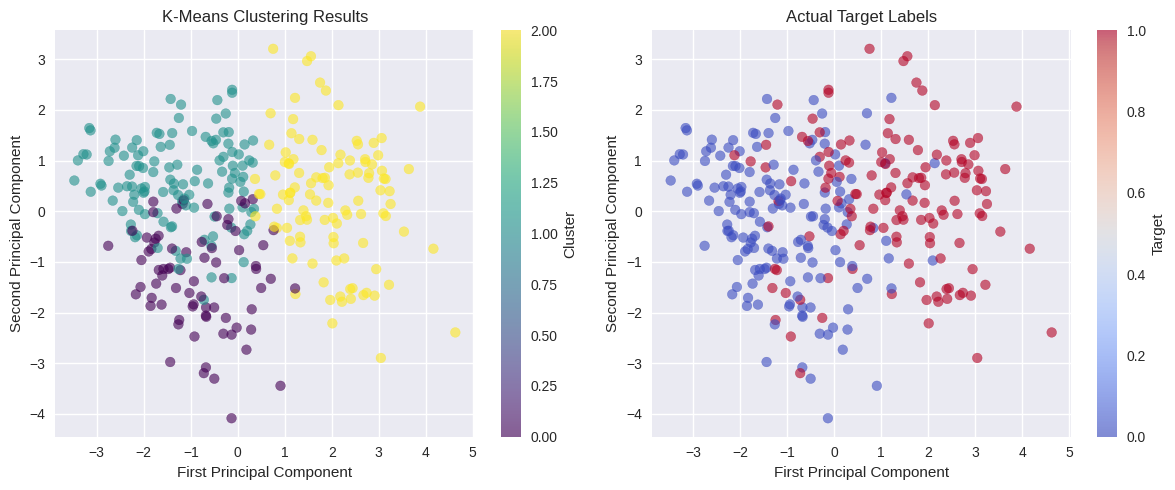

In [42]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
scatter1 = plt.scatter(X_pca_final[:, 0], X_pca_final[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.6)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('K-Means Clustering Results')
plt.colorbar(scatter1, label='Cluster')

plt.subplot(1, 2, 2)
scatter2 = plt.scatter(X_pca_final[:, 0], X_pca_final[:, 1], c=y, cmap='coolwarm', alpha=0.6)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Actual Target Labels')
plt.colorbar(scatter2, label='Target')

plt.tight_layout()
plt.show()

## 21. Hierarchical Clustering

Hierarchical Clustering


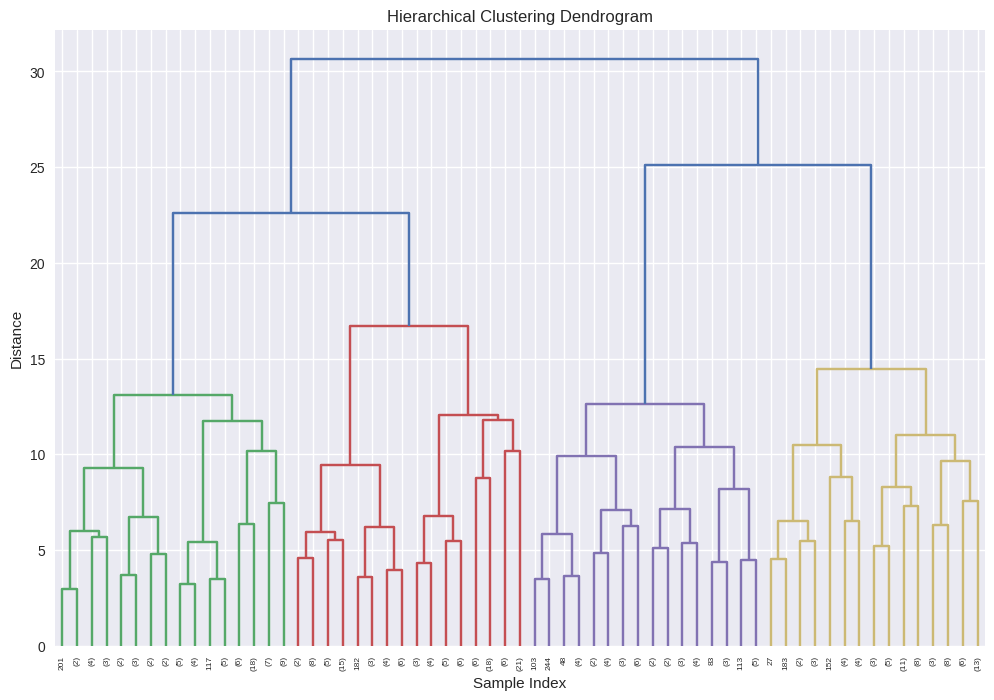

In [43]:
print("Hierarchical Clustering")

linkage_matrix = linkage(X_scaled, method='ward')

plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [44]:
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
agg_labels = agg_clustering.fit_predict(X_scaled)

## 22. Hierarchical Clustering Visualization

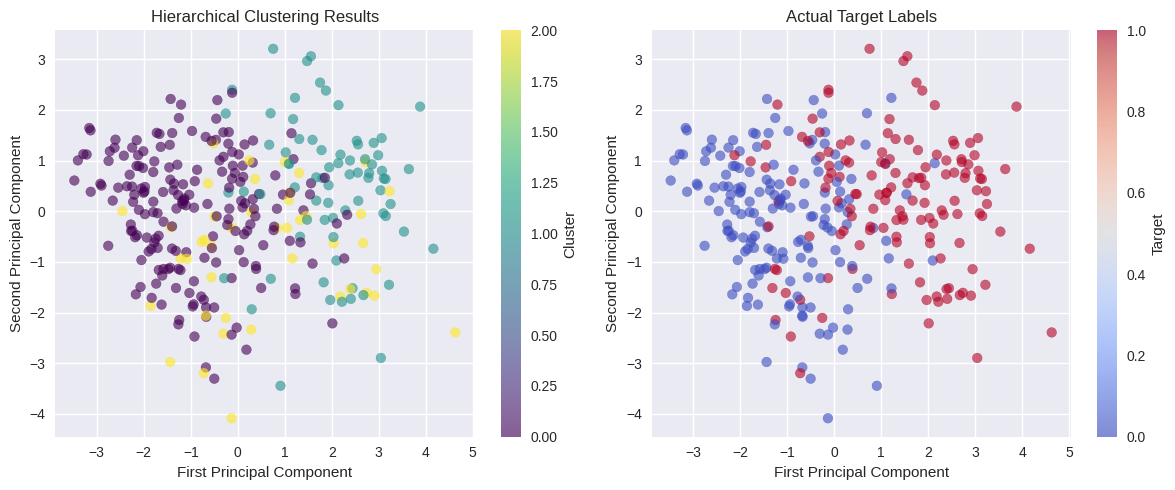

In [45]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
scatter3 = plt.scatter(X_pca_final[:, 0], X_pca_final[:, 1], c=agg_labels, cmap='viridis', alpha=0.6)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Hierarchical Clustering Results')
plt.colorbar(scatter3, label='Cluster')

plt.subplot(1, 2, 2)
scatter4 = plt.scatter(X_pca_final[:, 0], X_pca_final[:, 1], c=y, cmap='coolwarm', alpha=0.6)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Actual Target Labels')
plt.colorbar(scatter4, label='Target')

plt.tight_layout()
plt.show()

## 23. Clustering Results Comparison

In [46]:
print("\nK-Means Clustering vs Actual Labels:")
kmeans_comparison = pd.crosstab(kmeans_labels, y, margins=True)
print(kmeans_comparison)

print("\nHierarchical Clustering vs Actual Labels:")
agg_comparison = pd.crosstab(agg_labels, y, margins=True)
print(agg_comparison)


K-Means Clustering vs Actual Labels:
heart_disease    0    1  All
row_0                       
0               64   11   75
1               89   32  121
2               11   96  107
All            164  139  303

Hierarchical Clustering vs Actual Labels:
heart_disease    0    1  All
row_0                       
0              129   58  187
1               13   60   73
2               22   21   43
All            164  139  303


## 24. Hyperparameter Tuning - Grid Search for Random Forest

In [47]:
print("HYPERPARAMETER TUNING")
print("Grid Search for Random Forest")

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    rf_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

HYPERPARAMETER TUNING
Grid Search for Random Forest


In [48]:
rf_grid_search.fit(X_train, y_train)
best_rf = rf_grid_search.best_estimator_

In [49]:
print("Best Random Forest Parameters:")
print(rf_grid_search.best_params_)
print(f"Best Cross-validation Score: {rf_grid_search.best_score_:.4f}")

Best Random Forest Parameters:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Best Cross-validation Score: 0.8304


## 25. Hyperparameter Tuning - Randomized Search for SVM

In [50]:
print("Randomized Search for SVM")
svm_param_dist = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

svm_random_search = RandomizedSearchCV(
    SVC(probability=True, random_state=42),
    svm_param_dist,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

svm_random_search.fit(X_train, y_train)
best_svm = svm_random_search.best_estimator_

print("Best SVM Parameters:")
print(svm_random_search.best_params_)
print(f"Best Cross-validation Score: {svm_random_search.best_score_:.4f}")

Randomized Search for SVM
Best SVM Parameters:
{'kernel': 'rbf', 'gamma': 'scale', 'C': 0.1}
Best Cross-validation Score: 0.8180


## 26. Evaluating Optimized Models

In [51]:
print("Evaluating Optimized Models")

best_rf_pred = best_rf.predict(X_test)
best_rf_proba = best_rf.predict_proba(X_test)[:, 1]

print("Optimized Random Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, best_rf_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, best_rf_pred):.4f}")
print(f"AUC: {roc_auc_score(y_test, best_rf_proba):.4f}")

# Evaluate optimized SVM
best_svm_pred = best_svm.predict(X_test)
best_svm_proba = best_svm.predict_proba(X_test)[:, 1]

print("\nOptimized SVM Performance:")
print(f"Accuracy: {accuracy_score(y_test, best_svm_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, best_svm_pred):.4f}")
print(f"AUC: {roc_auc_score(y_test, best_svm_proba):.4f}")

# Compare with baseline models
baseline_rf_score = results['Random Forest']['Accuracy']
baseline_svm_score = results['SVM']['Accuracy']

print(f"Random Forest - Baseline: {baseline_rf_score:.4f}, Optimized: {accuracy_score(y_test, best_rf_pred):.4f}")
print(f"SVM - Baseline: {baseline_svm_score:.4f}, Optimized: {accuracy_score(y_test, best_svm_pred):.4f}")

Evaluating Optimized Models
Optimized Random Forest Performance:
Accuracy: 0.9180
F1-Score: 0.9123
AUC: 0.9502

Optimized SVM Performance:
Accuracy: 0.8689
F1-Score: 0.8621
AUC: 0.9242
Random Forest - Baseline: 0.8852, Optimized: 0.9180
SVM - Baseline: 0.8525, Optimized: 0.8689


## 27. Final Model Selection and Saving

In [52]:
print("FINAL MODEL SELECTION AND SAVING")

all_models = {
    'Logistic Regression': (model_objects['Logistic Regression'], results['Logistic Regression']['Accuracy']),
    'Decision Tree': (model_objects['Decision Tree'], results['Decision Tree']['Accuracy']),
    'Random Forest': (model_objects['Random Forest'], results['Random Forest']['Accuracy']),
    'SVM': (model_objects['SVM'], results['SVM']['Accuracy']),
    'Optimized Random Forest': (best_rf, accuracy_score(y_test, best_rf_pred)),
    'Optimized SVM': (best_svm, accuracy_score(y_test, best_svm_pred))
}

best_model_name = max(all_models, key=lambda x: all_models[x][1])
best_model = all_models[best_model_name][0]
best_accuracy = all_models[best_model_name][1]

print(f"Best Model: {best_model_name}")
print(f"Best Accuracy: {best_accuracy:.4f}")

# Build final pipeline
from sklearn.pipeline import Pipeline
final_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', best_model)
])
final_pipeline.fit(X_train, y_train)
print("Saving the final model...")
joblib.dump(final_pipeline, 'final_heart_disease_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(selected_features, 'selected_features.pkl')

print("Model saved successfully!")

FINAL MODEL SELECTION AND SAVING
Best Model: Optimized Random Forest
Best Accuracy: 0.9180
Saving the final model...
Model saved successfully!


## 29. Prediction Examples

In [53]:
print("PREDICTION EXAMPLES")
sample_indices = [0, 1, 2, 3, 4]
sample_data = X_test.iloc[sample_indices]
sample_targets = y_test.iloc[sample_indices]

predictions = best_model.predict(sample_data)
probabilities = best_model.predict_proba(sample_data)

print("Sample Predictions:")
for i, idx in enumerate(sample_indices):
    actual = sample_targets.iloc[i]
    predicted = predictions[i]
    prob_no_disease = probabilities[i][0]
    prob_disease = probabilities[i][1]

    print(f"Sample {i+1}:")
    print(f"  Actual: {'Disease' if actual == 1 else 'No Disease'}")
    print(f"  Predicted: {'Disease' if predicted == 1 else 'No Disease'}")
    print(f"  Probability No Disease: {prob_no_disease:.3f}")
    print(f"  Probability Disease: {prob_disease:.3f}")
    print()

PREDICTION EXAMPLES
Sample Predictions:
Sample 1:
  Actual: No Disease
  Predicted: No Disease
  Probability No Disease: 0.725
  Probability Disease: 0.275

Sample 2:
  Actual: No Disease
  Predicted: Disease
  Probability No Disease: 0.275
  Probability Disease: 0.725

Sample 3:
  Actual: No Disease
  Predicted: No Disease
  Probability No Disease: 0.955
  Probability Disease: 0.045

Sample 4:
  Actual: No Disease
  Predicted: No Disease
  Probability No Disease: 0.938
  Probability Disease: 0.062

Sample 5:
  Actual: No Disease
  Predicted: No Disease
  Probability No Disease: 0.627
  Probability Disease: 0.373

